In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas

from collections import defaultdict, Counter

## Part 1
<img src="img/Exercise04.png" width=1000>

In [219]:
data = [10, 20, 15, 100, 110, 50]

(array([2., 1., 0., 0., 1., 0., 0., 0., 0., 2.]),
 array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <BarContainer object of 10 artists>)

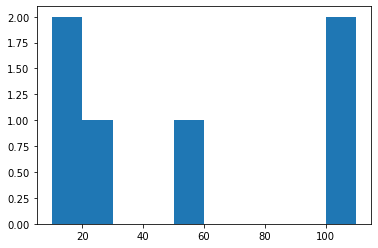

In [220]:
plt.hist(data)

In [221]:
def flat(x, lower, upper):
    try:
        len(x)
        r = np.zeros_like(x)
        L = (x > lower) & (x < upper)
        r[L] = 1/(upper - lower)
    except TypeError:
        if x > lower and x < upper:
            r = 1/(upper - lower)
        else:
            r = 0
    return r
    

In [222]:
def prior(a, b):
    return flat(a, lower=-100, upper=100) * flat(b, lower=0, upper=100)

In [223]:
def log_likelihood(a, b, data):
    return np.sum([np.log(1/np.pi * b/(b**2 + (x-a)**2)) for x in data], axis=0)

log_likelihood(10, 10, data)

-33.45523371309656

In [224]:
def posterior(a, b, data):
    return prior(a,b) * np.exp(log_likelihood(a,b, data))

In [225]:
def log_posterior(a, b, data):
    return np.log(prior(a,b)) + log_likelihood(a,b, data=data)

In [226]:
sampling = 100
a, b, = np.meshgrid(
    np.linspace(-110, 110, sampling),
    np.linspace(-10, 110, sampling)
)

In [227]:
log_posterior(a, b, data).shape

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/1077679288.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(prior(a,b)) + log_likelihood(a,b, data=data)
/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/2396326425.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum([np.log(1/np.pi * b/(b**2 + (x-a)**2)) for x in data], axis=0)


(100, 100)

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/1077679288.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(prior(a,b)) + log_likelihood(a,b, data=data)
/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/2396326425.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum([np.log(1/np.pi * b/(b**2 + (x-a)**2)) for x in data], axis=0)


Text(0, 0.5, 'y')

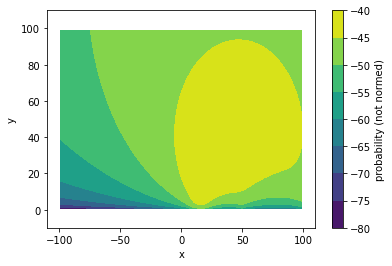

In [228]:
plt.contourf(
    a, b, 
    log_posterior(a, b, data)
)

cbar = plt.colorbar()
cbar.set_label("probability (not normed)")

plt.xlabel("x")
plt.ylabel("y")

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/1077679288.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(prior(a,b)) + log_likelihood(a,b, data=data)
/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/2396326425.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum([np.log(1/np.pi * b/(b**2 + (x-a)**2)) for x in data], axis=0)


[-110.         -107.77777778 -105.55555556 -103.33333333 -101.11111111
  -98.88888889  -96.66666667  -94.44444444  -92.22222222  -90.
  -87.77777778  -85.55555556  -83.33333333  -81.11111111  -78.88888889
  -76.66666667  -74.44444444  -72.22222222  -70.          -67.77777778
  -65.55555556  -63.33333333  -61.11111111  -58.88888889  -56.66666667
  -54.44444444  -52.22222222  -50.          -47.77777778  -45.55555556
  -43.33333333  -41.11111111  -38.88888889  -36.66666667  -34.44444444
  -32.22222222  -30.          -27.77777778  -25.55555556  -23.33333333
  -21.11111111  -18.88888889  -16.66666667  -14.44444444  -12.22222222
  -10.           -7.77777778   -5.55555556   -3.33333333   -1.11111111
    1.11111111    3.33333333    5.55555556    7.77777778   10.
   12.22222222   14.44444444   16.66666667   18.88888889   21.11111111
   23.33333333   25.55555556   27.77777778   30.           32.22222222
   34.44444444   36.66666667   38.88888889   41.11111111   43.33333333
   45.55555556   47.77

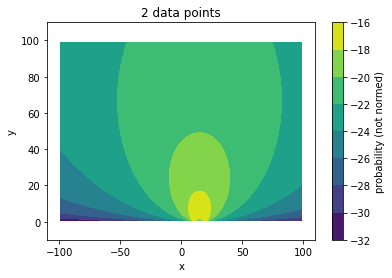

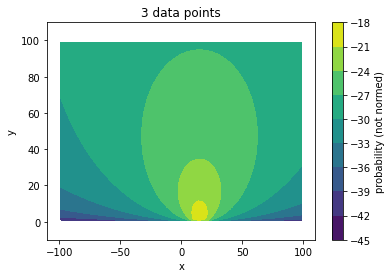

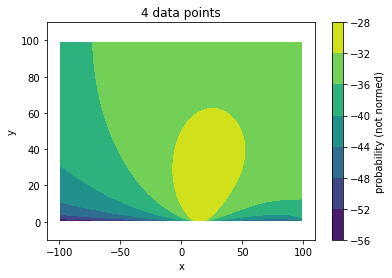

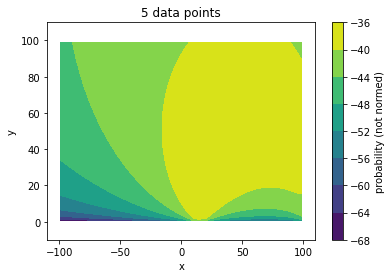

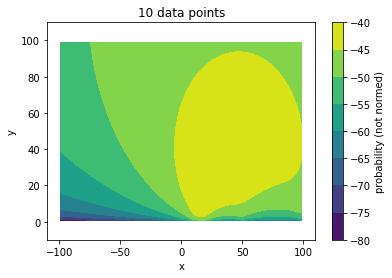

In [229]:
for n in [2, 3, 4, 5, 10,]:

    p = log_posterior(a, b, data[:n])

    index = np.argmax(p)
    print(a[index], b[index])

    plt.figure()
    plt.title(f"{n} data points")
    plt.contourf(
        a, b, 
        p
    )

    cbar = plt.colorbar()
    cbar.set_label("probability (not normed)")

    plt.xlabel("x")
    plt.ylabel("y")

In [230]:
for n in [2, 3, 4, 5, 10,]:

    p = log_posterior(a, b, data[:n])

    index = np.nanargmax(p)
    a_expected = a.flatten()[index]
    b_expected = b.flatten()[index]

    print(f"Expectation at n={n:2d}: {a_expected:02.1f}, {b_expected:02.1f}")

Expectation at n= 2: 16.7, 4.5
Expectation at n= 3: 14.4, 3.3
Expectation at n= 4: 14.4, 4.5
Expectation at n= 5: 16.7, 9.4
Expectation at n=10: 23.3, 20.3


/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/1077679288.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(prior(a,b)) + log_likelihood(a,b, data=data)
/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/2396326425.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum([np.log(1/np.pi * b/(b**2 + (x-a)**2)) for x in data], axis=0)


## Part 2

(array([ 4.,  1.,  8.,  4.,  6., 11.,  7.,  2.,  5.,  2.]),
 array([-64.30454219, -45.70536775, -27.10619331,  -8.50701887,
         10.09215557,  28.69133001,  47.29050445,  65.88967889,
         84.48885333, 103.08802777, 121.68720221]),
 <BarContainer object of 10 artists>)

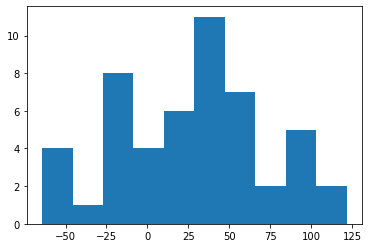

In [231]:
data = np.random.randn(50)*50 + 30
plt.hist(data)

In [232]:
def variance_a(b, data, sampling=10):
    a = np.linspace(-100, 100, sampling)

    p = log_likelihood(a, b, data=data)

    return np.dot(a, np.exp(a))

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_30372/2396326425.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum([np.log(1/np.pi * b/(b**2 + (x-a)**2)) for x in data], axis=0)


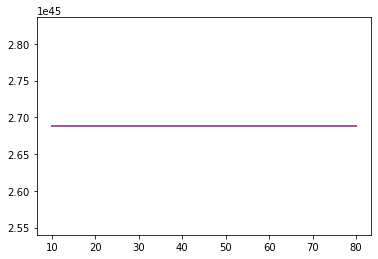

In [233]:
N = [10, 20, 30, 40, 50, 60, 80]

for b in [-10, 10, 30, 50, 100]:

    sigma = [variance_a(b, data=data[:n]) for n in N]

    plt.plot(N, sigma, label=b)

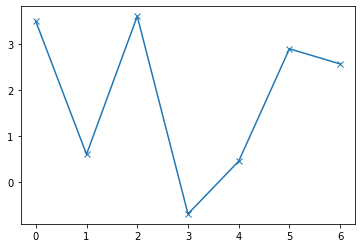

In [234]:
data = np.array([
    [0, 3.5],
    [1, 0.6],
    [2, 3.61],
    [3, -0.7],
    [4, 0.45],
    [5, 2.9],
    [6, 2.57]
])

plt.plot(data[:, 0], data[:, 1], "x-")

In [235]:
def prior(a):
    return flat(a, lower=-10, upper=10)

prior(2)

0.05

In [236]:
def func(x, a):
    return a*np.cos(x)

In [ ]:
def likelihood_exponent(a, data, f=func, b=1.1):
    x, y = data.transpose()
    return np.array([
        np.sum(np.abs(y - f(x, aa))) if np.all(y > f(x, aa)) else 0 for aa in a
    ])

def log_likelihood(a, data, f=func, b=1.1):

    return likelihood_exponent(a, data, f=func, b=1.1) -len(data) * np.log(b)
